
 # DMC - Python for Analytics - Sesión 04
 Profesor: Manuel Montoya | Data Scientist @ Belcorp

In [185]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
import os
import pandas
import numpy
import sklearn
import seaborn
import matplotlib.pyplot as plt

In [187]:
path_base = '/content/drive/My Drive/python-for-analytics/sesion-04/data'

os.listdir(path_base)

['cereal.csv',
 'taxi_data_train.csv',
 'taxi_data_test.csv',
 'casas.txt',
 'casas_multiple.txt',
 'titanic.csv']

# Regresión Simple

In [188]:
df_casas = pandas.read_csv(f'{path_base}/casas.txt', sep = '\t', names= ["area", "precio"], header = None)
df_casas.head()

,area,precio
0,132.3,319000.0
1,141.5,389000.0
2,71.2,199000.0
3,277.4,599000.0
4,338.7,750000.0


In [189]:
df_casas.describe()

,area,precio
count,58.000000,58.000000
mean,205.465517,429402.068966
std,111.225913,241103.667634
min,59.400000,90000.000000
25%,120.650000,241750.000000
50%,178.450000,379000.000000
75%,262.100000,589250.000000
max,520.000000,949000.000000


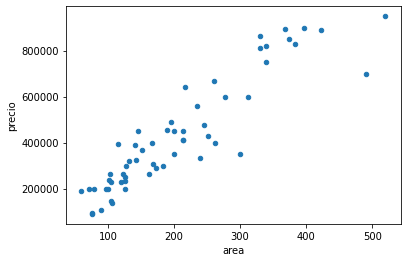

In [190]:
df_casas.plot.scatter("area", "precio")

In [191]:
from sklearn.linear_model import LinearRegression

In [196]:
modelo = LinearRegression()
modelo.fit(X = df_casas[["area"]], y=df_casas["precio"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
m = modelo.coef_
b = modelo.intercept_

m, b

(array([1981.9143839]), 22187.004950031114)

In [198]:
prediccion = modelo.predict(df_casas[["area"]])
prediccion

array([ 284394.27793958,  302627.89027143,  163299.30908348,
        571970.055043  ,  693461.40677588,  677209.70882792,
        860338.59789999,  750738.7324705 ,  520242.0896233 ,
        273890.13170492,  312141.07931413,  640544.29272583,
        224738.65498428,  352175.74986885,  780665.63966734,
        693461.40677588,  398750.73789042,  764215.75028099,
        179154.62415466,  677209.70882792,  807421.48384994,
        271908.21732103,  304807.99609372,  445325.725912  ,
        445325.725912  ,  450280.51187174,  252089.07348206,
        486747.73653544,  507756.02900475,  199370.15087041,
        139912.7193535 ,  226324.1864914 ,  272106.40875942,
        231278.97245114,  386066.48583348,  365652.76767935,
        537484.7447632 ,  322248.84267201,  356139.57863664,
        259620.34814087,  228504.29231369,  272106.40875942,
        543034.10503811,  215027.27450319,  445325.725912  ,
        410047.64987864,  497846.45708526,  172019.73237263,
        221765.78340844,

In [199]:
df_casas["prediccion"] = prediccion
df_casas.head()

,area,precio,prediccion
0,132.3,319000.0,284394.277940
1,141.5,389000.0,302627.890271
2,71.2,199000.0,163299.309083
3,277.4,599000.0,571970.055043
4,338.7,750000.0,693461.406776


In [200]:
# Error cuadrático medio

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df_casas["precio"], df_casas["prediccion"]) ** (0.5)
rmse

96812.43817508711

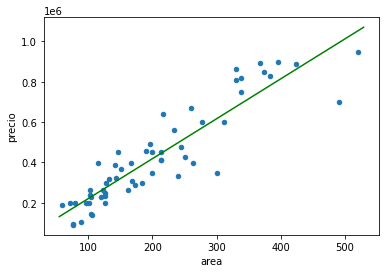

In [ ]:
linear_space = numpy.arange(55, 530, 1)

df_casas.plot.scatter("area", "precio")
plt.plot(linear_space, m*linear_space + b, 'g')

In [201]:
m, b

(array([1981.9143839]), 22187.004950031114)

# Regresión Múltiple

In [202]:
df_casas_multiple = pandas.read_csv(f'{path_base}/casas_multiple.txt', sep = '\t', names= ["area", "baños", "dormitorios", "antiguedad", "precio"], header = None)
df_casas_multiple.head()

,area,baños,dormitorios,antiguedad,precio
0,132.3,3,2,66.15,319000.0
1,141.5,3,2,70.75,389000.0
2,71.2,1,1,71.20,199000.0
3,277.4,3,2,138.70,599000.0
4,338.7,4,4,84.68,750000.0


In [203]:
df_casas_multiple.describe()

,area,baños,dormitorios,antiguedad,precio
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,205.465517,3.275862,2.672414,78.419310,429402.068966
std,111.225913,1.308449,1.467638,23.732052,241103.667634
min,59.400000,1.000000,1.000000,42.000000,90000.000000
25%,120.650000,3.000000,2.000000,60.325000,241750.000000
50%,178.450000,3.000000,3.000000,75.650000,379000.000000
75%,262.100000,4.000000,3.000000,93.150000,589250.000000
max,520.000000,10.000000,11.000000,138.700000,949000.000000


In [213]:
modelo = LinearRegression()

In [206]:
df_casas_multiple.drop("precio", axis = 1).head()

,area,baños,dormitorios,antiguedad
0,132.3,3,2,66.15
1,141.5,3,2,70.75
2,71.2,1,1,71.20
3,277.4,3,2,138.70
4,338.7,4,4,84.68


In [214]:
modelo.fit(df_casas_multiple.drop("precio", axis = 1), df_casas_multiple["precio"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
m = modelo.coef_
b = modelo.intercept_

m, b

(array([ 5.49222389e-07, -1.48734134e-05,  1.64517571e-06,  1.09501340e-07,
         1.00000000e+00]), 1.9183207768946886e-05)

In [216]:
df_casas_multiple.columns

Index(['area', 'baños', 'dormitorios', 'antiguedad', 'precio', 'prediccion'], dtype='object')

In [217]:
prediccion = modelo.predict(df_casas_multiple.drop("precio", axis = 1))

In [218]:
df_casas_multiple["prediccion"] = prediccion
df_casas_multiple.head()

,area,baños,dormitorios,antiguedad,precio,prediccion
0,132.3,3,2,66.15,319000.0,257573.373165
1,141.5,3,2,70.75,389000.0,282352.839408
2,71.2,1,1,71.20,199000.0,235709.619927
3,277.4,3,2,138.70,599000.0,648388.650541
4,338.7,4,4,84.68,750000.0,720494.734537


In [219]:
# Error cuadrático medio

rmse = mean_squared_error(df_casas_multiple["precio"], df_casas_multiple["prediccion"]) ** (0.5)
rmse

78936.08203564238

# Ejercicio: duración de viajes de taxis
Dataset obtenido de: https://www.kaggle.com/c/nyc-taxi-trip-duration/data

In [220]:
os.listdir(path_base)

['cereal.csv',
 'taxi_data_train.csv',
 'taxi_data_test.csv',
 'casas.txt',
 'casas_multiple.txt',
 'titanic.csv']

In [221]:
df_taxi_train = pandas.read_csv(f'{path_base}/taxi_data_train.csv')
df_taxi_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [222]:
df_taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [223]:
df_taxi_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Valores extremos

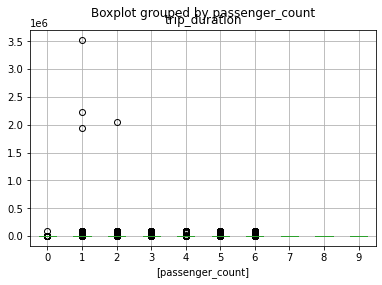

In [224]:
df_taxi_train.get(["passenger_count", "trip_duration"]).boxplot(by = "passenger_count")b

In [226]:
p99 = numpy.percentile(df_taxi_train["trip_duration"], 0.99)
p99

86.0

In [227]:
df_taxi_aux = df_taxi_train.loc[df_taxi_train["trip_duration"] < p99]

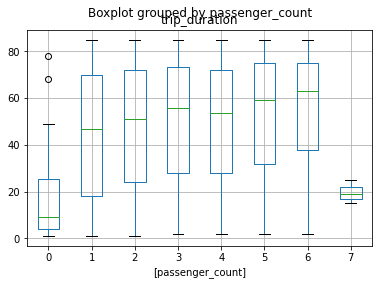

In [228]:
df_taxi_aux.get(["passenger_count", "trip_duration"]).boxplot(by = "passenger_count")

In [229]:
df_taxi_train["pickup_datetime"] = pandas.to_datetime(df_taxi_train["pickup_datetime"])
df_taxi_train["dropoff_datetime"] = pandas.to_datetime(df_taxi_train["dropoff_datetime"])

In [230]:
df_taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [231]:
df_taxi_train["day_name"] = df_taxi_train["pickup_datetime"].dt.day_name()
df_taxi_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday


In [232]:
def is_weekend(day):
    if day in ["Saturday", "Sunday"]:
        return 1
    else:
        return 0

df_taxi_train["weekend"] = df_taxi_train["day_name"].apply(lambda value: is_weekend(value))
df_taxi_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1


In [233]:
df_taxi_train["weekend"] = numpy.where(df_taxi_train["day_name"].isin(["Saturday", "Sunday"]), 1, 0)
df_taxi_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1


In [234]:
df_taxi_train["hour"] = df_taxi_train["pickup_datetime"].dt.hour
df_taxi_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name,weekend,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,0,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,0,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1,13


In [235]:
df_taxi_train["rush_hour"] = numpy.where((df_taxi_train["hour"] >= 16) & (df_taxi_train["hour"] <= 20) , 1, 0)
df_taxi_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name,weekend,hour,rush_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,0,11,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,0,19,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1,13,0


Geografía del taxista https://es.wikipedia.org/wiki/Geometr%C3%ADa_del_taxista

In [236]:
df_taxi_train["distance"] = numpy.abs(df_taxi_train["pickup_longitude"] - df_taxi_train["dropoff_longitude"]) + \
                            numpy.abs(df_taxi_train["pickup_latitude"] - df_taxi_train["dropoff_latitude"])

df_taxi_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_name,weekend,hour,rush_hour,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,17,1,0.019859
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,1,0,0,0.026478
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,0,11,0,0.080158
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,0,19,1,0.015480
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,1,13,0,0.010818


In [237]:
df_taxi_train_final = df_taxi_train.get(["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "weekend", "rush_hour", "distance", "passenger_count", "trip_duration"])
df_taxi_train_final.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,weekend,rush_hour,distance,passenger_count,trip_duration
0,-73.982155,40.767937,-73.964630,40.765602,0,1,0.019859,1,455
1,-73.980415,40.738564,-73.999481,40.731152,1,0,0.026478,1,663
2,-73.979027,40.763939,-74.005333,40.710087,0,0,0.080158,1,2124
3,-74.010040,40.719971,-74.012268,40.706718,0,1,0.015480,1,429
4,-73.973053,40.793209,-73.972923,40.782520,1,0,0.010818,1,435


In [238]:
df_features = df_taxi_train_final.get(["pickup_longitude",	"pickup_latitude",	"dropoff_longitude",	"dropoff_latitude", "passenger_count"])
df_target = df_taxi_train_final["trip_duration"]

model = LinearRegression()
model.fit(df_features, df_target)
prediction = model.predict(df_features)
rmse = mean_squared_error(df_target, prediction) ** (0.5)

print(rmse)

5232.741667481629


In [239]:
df_features = df_taxi_train_final.get(["distance"])
df_target = df_taxi_train_final["trip_duration"]

model = LinearRegression()
model.fit(df_features, df_target)
prediction = model.predict(df_features)
rmse = mean_squared_error(df_target, prediction) ** (0.5)

print(rmse)

5213.873403915693


In [240]:
df_features = df_taxi_train_final.get(["distance", "weekend", "rush_hour"])
df_target = df_taxi_train_final["trip_duration"]

model = LinearRegression()
model.fit(df_features, df_target)
prediction = model.predict(df_features)
rmse = mean_squared_error(df_target, prediction) ** (0.5)

print(model.coef_, model.intercept_)
print(rmse)

[8320.5406114   -55.44549629   30.49674618] 584.9076892277022
5213.793945321235


In [241]:
from sklearn.tree import DecisionTreeRegressor

In [242]:
df_features = df_taxi_train_final.get(["pickup_longitude",	"pickup_latitude",	"dropoff_longitude",	"dropoff_latitude", "passenger_count"])
df_target = df_taxi_train_final["trip_duration"]

model = DecisionTreeRegressor()
model.fit(df_features, df_target)
prediction = model.predict(df_features)
rmse = mean_squared_error(df_target, prediction) ** (0.5)

print(rmse)

50.411826165667875


In [243]:
df_features = df_taxi_train_final.get(["distance", "weekend", "rush_hour", "pickup_longitude",	"pickup_latitude",	"dropoff_longitude",	"dropoff_latitude", "passenger_count"])
df_target = df_taxi_train_final["trip_duration"]

model = DecisionTreeRegressor()
model.fit(df_features, df_target)
prediction = model.predict(df_features)
rmse = mean_squared_error(df_target, prediction) ** (0.5)

print(rmse)

6.655478449146573
